# To build a model for training and testing:

In [11]:
import os                                                                                                                                         
import numpy as np # linear algebra
import matplotlib.pyplot as plt

In [1]:
# Dl framwork - tensorflow, keras a backend 
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization 
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping 
from IPython.display import display
from os import listdir
from os.path import isfile, join
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

ModuleNotFoundError: No module named 'tensorflow'

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
dir_name_train_No_DR = 'dataset/Train/No_DR'
dir_name_train_Severe = 'dataset/Train/Severe'

In [3]:
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(80, 40))
    for idx, img_path in enumerate(item_files):
        plt.subplot(3, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()

In [4]:
def Images_details_Print_data(data, path):
    print(" ====== Images in: ", path)    
    for k, v in data.items():
        print("%s:\t%s" % (k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100  # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100  # No image will be bigger than that
    data['max_height'] = 0


    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['max_width'] = max(width, data['max_height'])
        data['min_height'] = min(height, data['min_height'])
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)

In [1]:
print("")
print("Trainned data for No_DR:")
print("")
Images_details(dir_name_train_No_DR)
print("")
plot_images(dir_name_train_No_DR, 10) 


Trainned data for No_DR:



NameError: name 'Images_details' is not defined

In [6]:
print("")
print("Trainned data for Severe:")
print("")
Images_details(dir_name_train_Severe)
print("")
plot_images(dir_name_train_Severe, 10)


Trainned data for Severe:



NameError: name 'glob' is not defined

In [7]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,(3,3),input_shape=(512,512,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(38, activation='relu'))

NameError: name 'Sequential' is not defined

In [20]:
Classifier.add(Dense(2, activation='softmax'))
Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

NameError: name 'Classifier' is not defined

In [28]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

NameError: name 'ImageDataGenerator' is not defined

In [4]:
training_set=train_datagen.flow_from_directory('dataset/Train',target_size=(512,512),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('dataset/Test',target_size=(512,512),batch_size=32,class_mode='categorical')

NameError: name 'train_datagen' is not defined

In [2]:
img_dims = 150
epochs = 10
batch_size = 32

In [14]:
#### Fitting the model
history = Classifier.fit_generator(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
6/6 [==============================] - 47s 8s/step - loss: 91.5135 - accuracy: 0.5536 - val_loss: 60.9238 - val_accuracy: 0.5078
Epoch 2/10
6/6 [==============================] - 23s 4s/step - loss: 23.4440 - accuracy: 0.5573 - val_loss: 6.7302 - val_accuracy: 0.6953
Epoch 3/10
6/6 [==============================] - 23s 4s/step - loss: 4.0735 - accuracy: 0.6071 - val_loss: 1.1231 - val_accuracy: 0.8203
Epoch 4/10
6/6 [==============================] - 25s 4s/step - loss: 5.1717 - accuracy: 0.6510 - val_loss: 2.6196 - val_accuracy: 0.7656
Epoch 5/10
6/6 [==============================] - 23s 4s/step - loss: 3.0872 - accuracy: 0.6726 - val_loss: 0.8415 - val_accuracy: 0.8750
Epoch 6/10
6/6 [==============================] - 22s 4s/step - loss: 2.5021 - accuracy: 0.6131 - val_loss: 0.3504 - val_accuracy: 0.8906
Epoch 7/10
6/6 [==============================] - 25s 4s/step - loss: 3.0716 - accuracy: 0.51

In [8]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

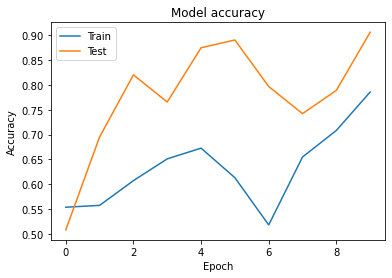

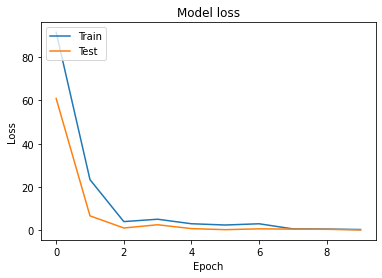

In [16]:
graph()